# Telco Customer Churn Analysis and Feature Engineering

## Project Overview
This notebook is the first step in our Telco Customer Churn Prediction project. We'll be exploring the dataset, performing initial data analysis, and preparing our features for the modeling phase.

## Problem Statement
Customer churn is a critical issue for telecommunications companies, as retaining existing customers is often more cost-effective than acquiring new ones. Churn occurs when customers stop using a company's products or services, leading to revenue loss and potential reputational damage. Understanding the factors that contribute to churn and identifying high-risk customers early can provide actionable insights for targeted retention strategies. Our goal is to develop a predictive model that can effectively identify customers at high risk of churning, enabling the company to take proactive measures to improve customer satisfaction and loyalty.

## Objectives
1. Load and explore the Telco Customer Churn dataset
2. Perform data cleaning and handle missing values
3. Conduct exploratory data analysis on categorical and numerical variables
4. Visualize the relationships between key features and churn
5. Engineer new features to enhance predictive power
6. Preprocess the data for modeling

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore")

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_theme(style="darkgrid")

## Data Loading and Initial Exploration


### **Dataset Overview**
The Telco Customer Churn dataset is a comprehensive dataset for analyzing customer attrition (churn) in the telecommunications industry. It contains customer information and service details, enabling predictive modeling to determine whether a customer will churn (i.e., leave the service) based on their profile and usage patterns.

### **Features Description**

1. **CustomerID**:
   - **Type**: String
   - **Description**: A unique identifier for each customer. Serves as the primary key and is used for indexing.

2. **Gender**:
   - **Type**: Categorical (Male, Female)
   - **Description**: Indicates the gender of the customer.

3. **SeniorCitizen**:
   - **Type**: Integer (0, 1)
   - **Description**: Indicates whether the customer is a senior citizen (1) or not (0).

4. **Partner**:
   - **Type**: Categorical (Yes, No)
   - **Description**: Indicates whether the customer has a partner.

5. **Dependents**:
   - **Type**: Categorical (Yes, No)
   - **Description**: Indicates whether the customer has dependents (e.g., children, other family members).

6. **Tenure**:
   - **Type**: Numeric (Integer)
   - **Description**: The number of months the customer has been with the service provider.

7. **PhoneService**:
   - **Type**: Categorical (Yes, No)
   - **Description**: Indicates whether the customer has a phone service.

8. **MultipleLines**:
   - **Type**: Categorical (No, Yes, No phone service)
   - **Description**: Indicates whether the customer has multiple phone lines.

9. **InternetService**:
   - **Type**: Categorical (DSL, Fiber optic, No)
   - **Description**: Indicates the type of internet service the customer uses.

10. **OnlineSecurity**:
    - **Type**: Categorical (Yes, No, No internet service)
    - **Description**: Indicates whether the customer has opted for an online security add-on.

11. **OnlineBackup**:
    - **Type**: Categorical (Yes, No, No internet service)
    - **Description**: Indicates whether the customer has opted for an online backup add-on.

12. **DeviceProtection**:
    - **Type**: Categorical (Yes, No, No internet service)
    - **Description**: Indicates whether the customer has opted for a device protection plan.

13. **TechSupport**:
    - **Type**: Categorical (Yes, No, No internet service)
    - **Description**: Indicates whether the customer has opted for technical support.

14. **StreamingTV**:
    - **Type**: Categorical (Yes, No, No internet service)
    - **Description**: Indicates whether the customer streams TV using the service provider.

15. **StreamingMovies**:
    - **Type**: Categorical (Yes, No, No internet service)
    - **Description**: Indicates whether the customer streams movies using the service provider.

16. **Contract**:
    - **Type**: Categorical (Month-to-month, One year, Two year)
    - **Description**: The type of contract the customer has signed.

17. **PaperlessBilling**:
    - **Type**: Categorical (Yes, No)
    - **Description**: Indicates whether the customer uses paperless billing.

18. **PaymentMethod**:
    - **Type**: Categorical (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    - **Description**: The payment method chosen by the customer.

19. **MonthlyCharges**:
    - **Type**: Numeric (Float)
    - **Description**: The monthly charges the customer incurs.

20. **TotalCharges**:
    - **Type**: Numeric (Float)
    - **Description**: The total charges the customer has incurred.

21. **Churn**:
    - **Type**: Categorical (Yes, No)
    - **Description**: The target variable indicating whether the customer churned (Yes) or not (No).

Let's load the dataset and take a look at its basic structure and information.

In [2]:
# Load the dataset
df = pd.read_csv(
    "../data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
)

Let us have a look at the first 4 rows

In [3]:
# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The above rows gives us a basic idea of the type of values in each column, now let us have a overall summary of the dataset

In [4]:
# Display basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [5]:
# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning and Preprocessing
Now, let's check for missing values and handle any data type issues.

In [7]:
# Check for missing values
print("Missing Values:")
df.isna().sum()

Missing Values:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As you can see there is no missing values except in TotalCharges Columns

In [21]:
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

As you can see there are some row in the dataset that is having empty string which is not directly detecable by the isna() so we have to handle it seperatly

In [24]:
# Convert TotalCharges to numeric, replacing empty strings with NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill NaN values in TotalCharges with the mean
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [25]:
# Convert 'SeniorCitizen' to categorical
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [26]:
print("\nUpdated Data Types:")
df.dtypes


Updated Data Types:


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Exploratory Data Analysis
### Categorical Variables
Let's visualize the distribution of categorical variables and their relationship with churn.

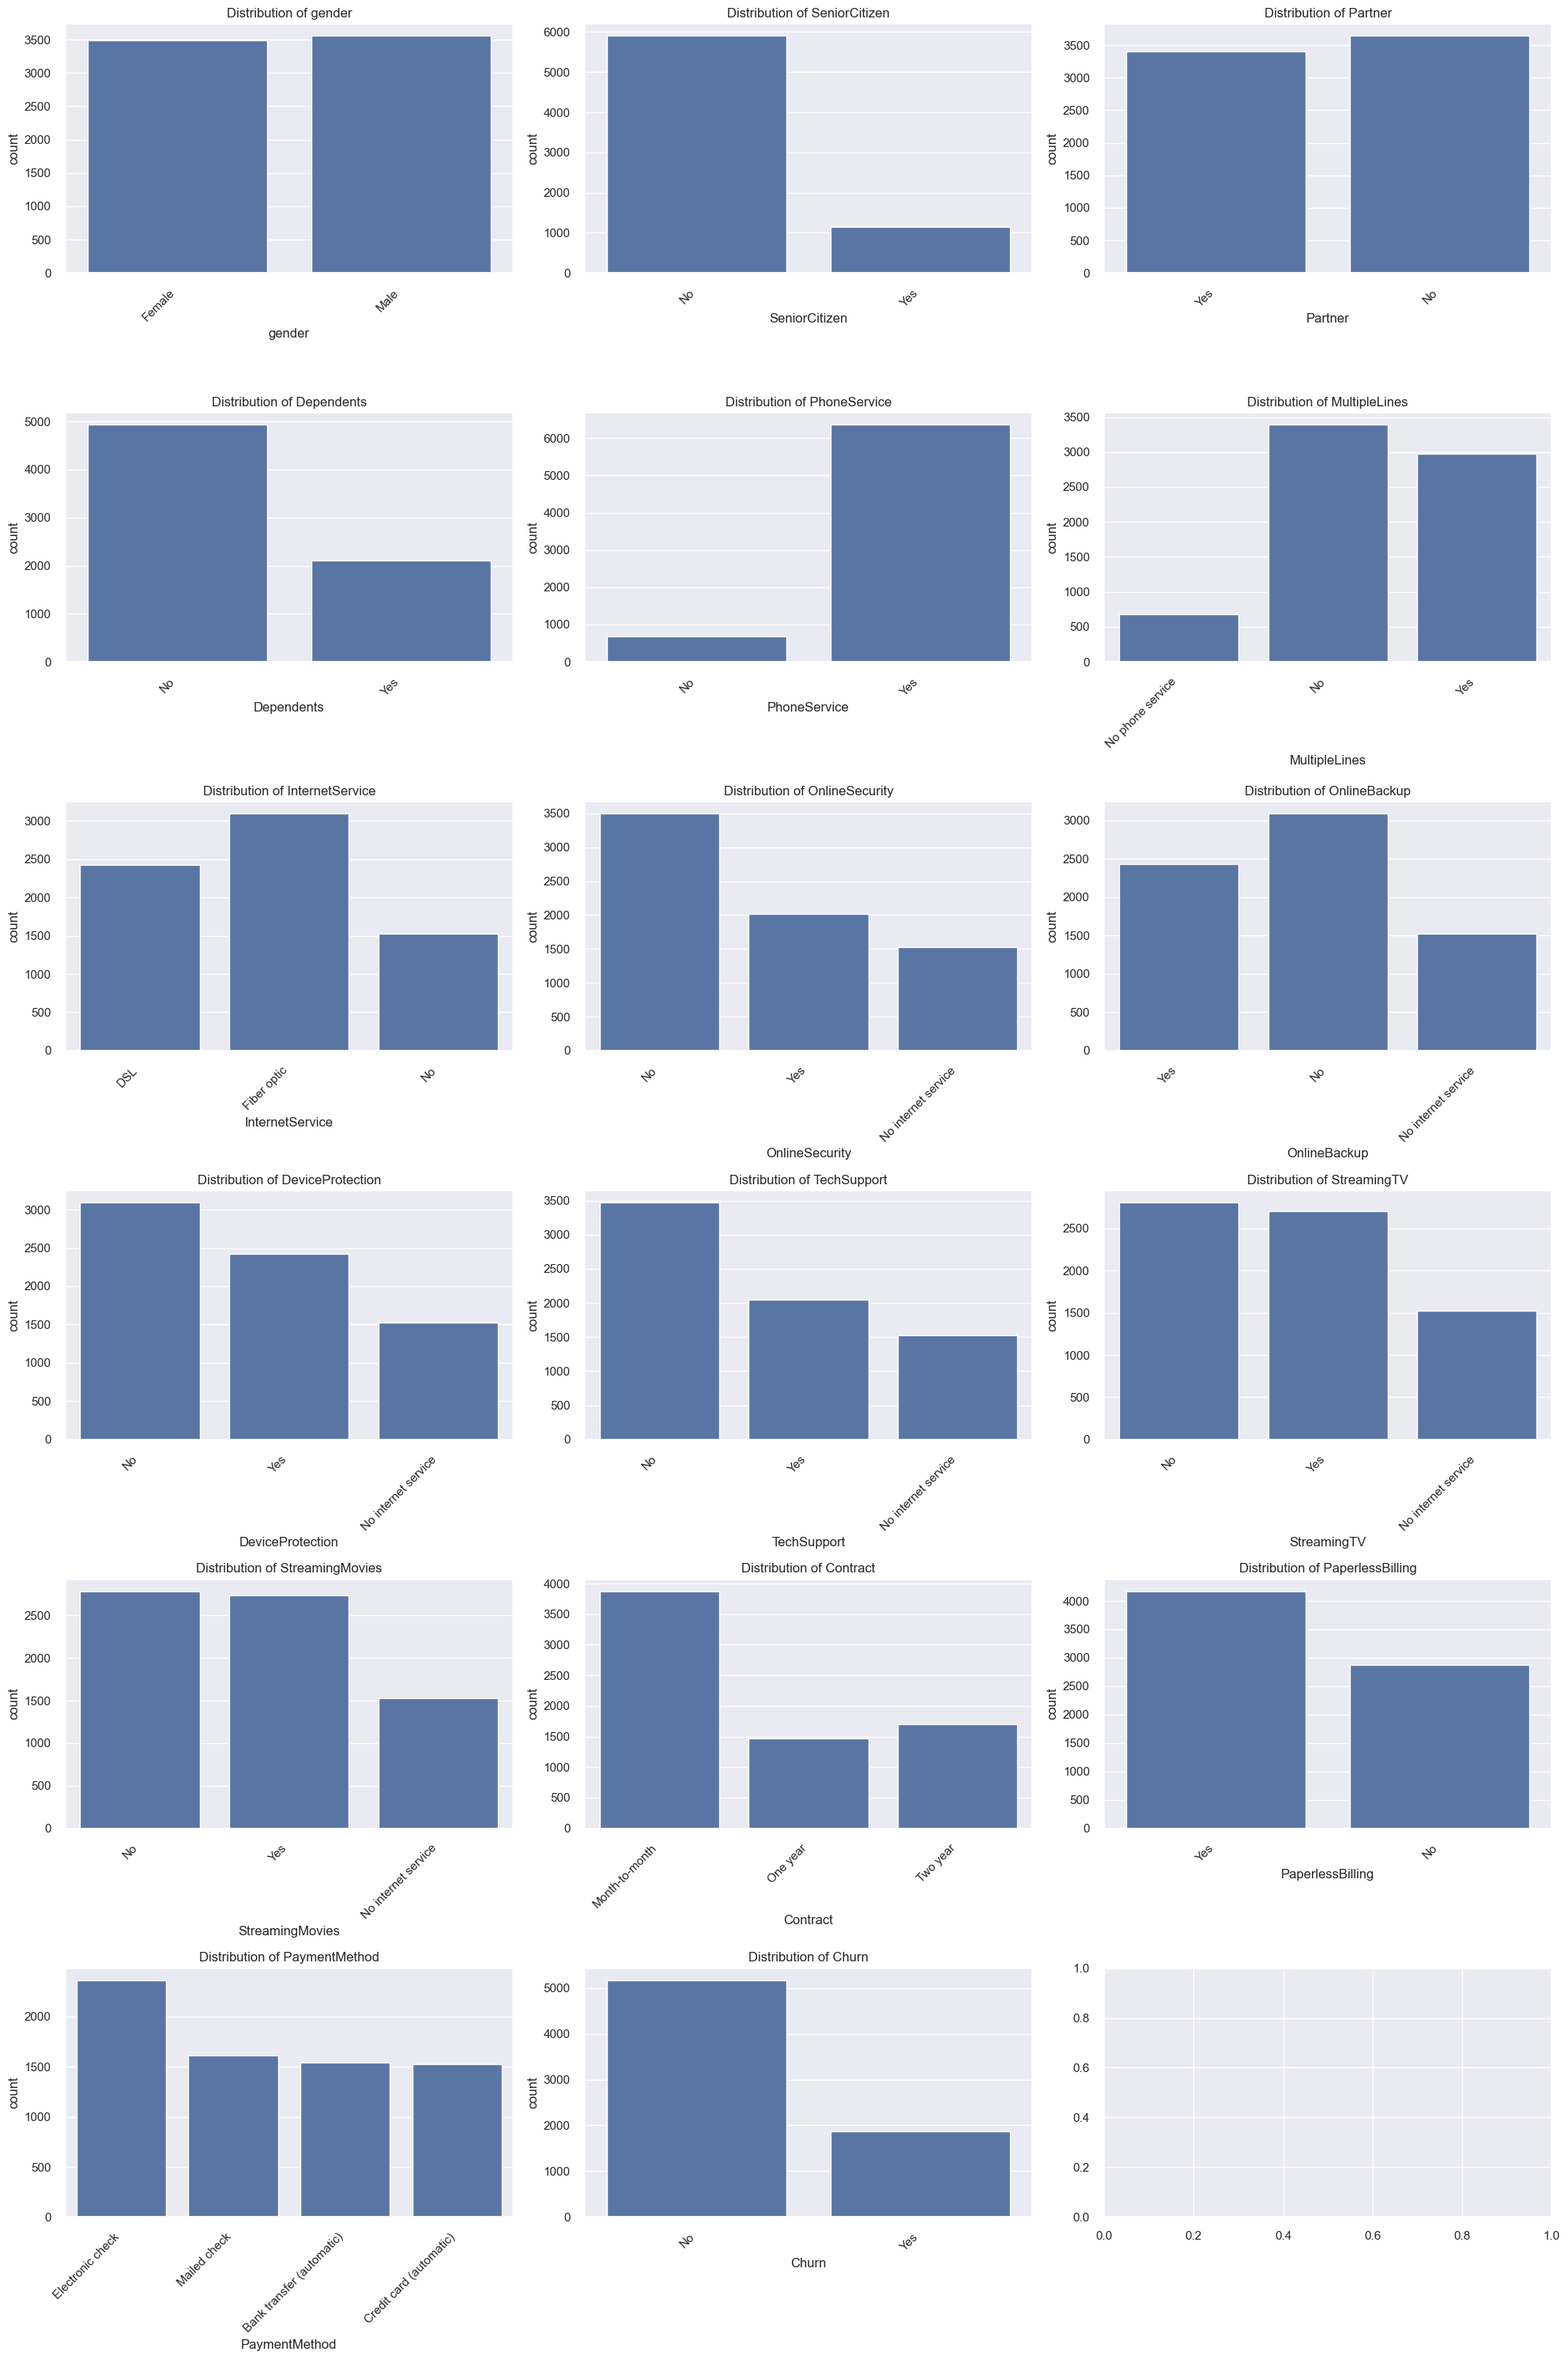

In [27]:
# List of categorical variables
cat_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Plot distribution of categorical variables
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Numerical Variables
Now, let's examine the distribution of numerical variables and their relationship with churn.

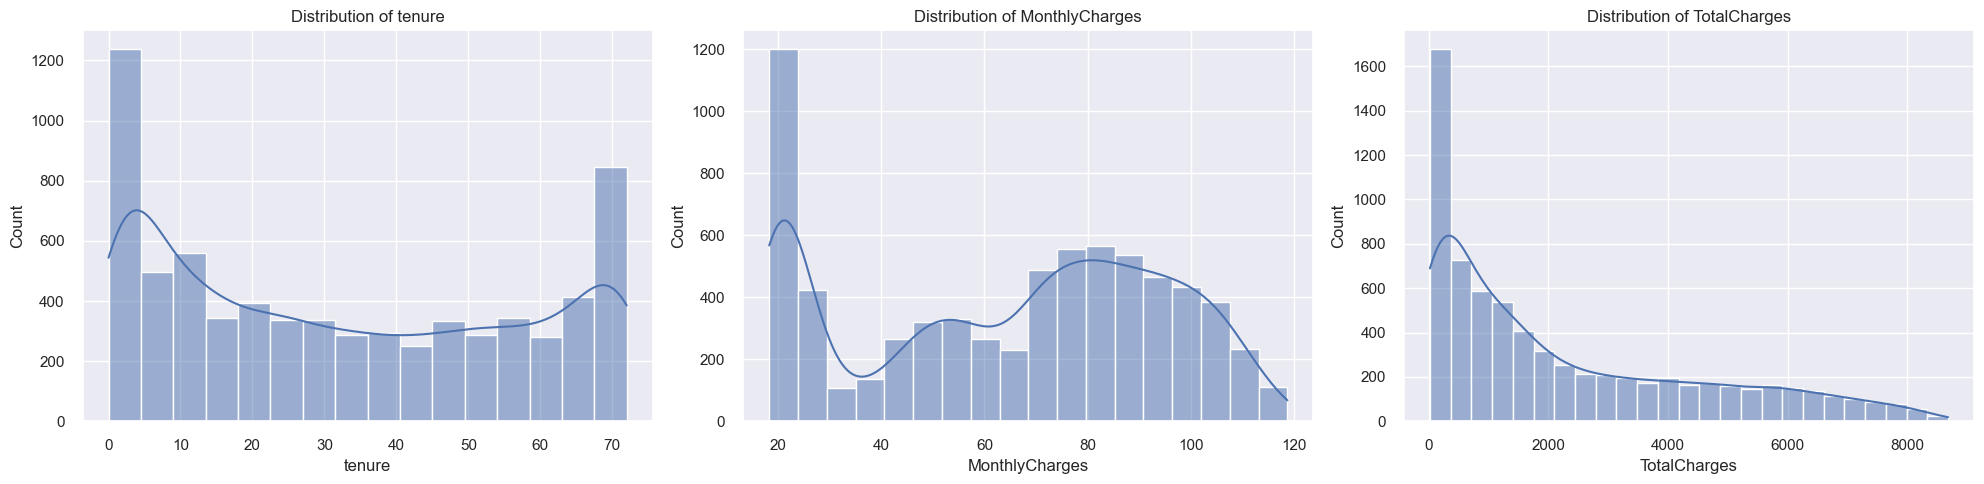

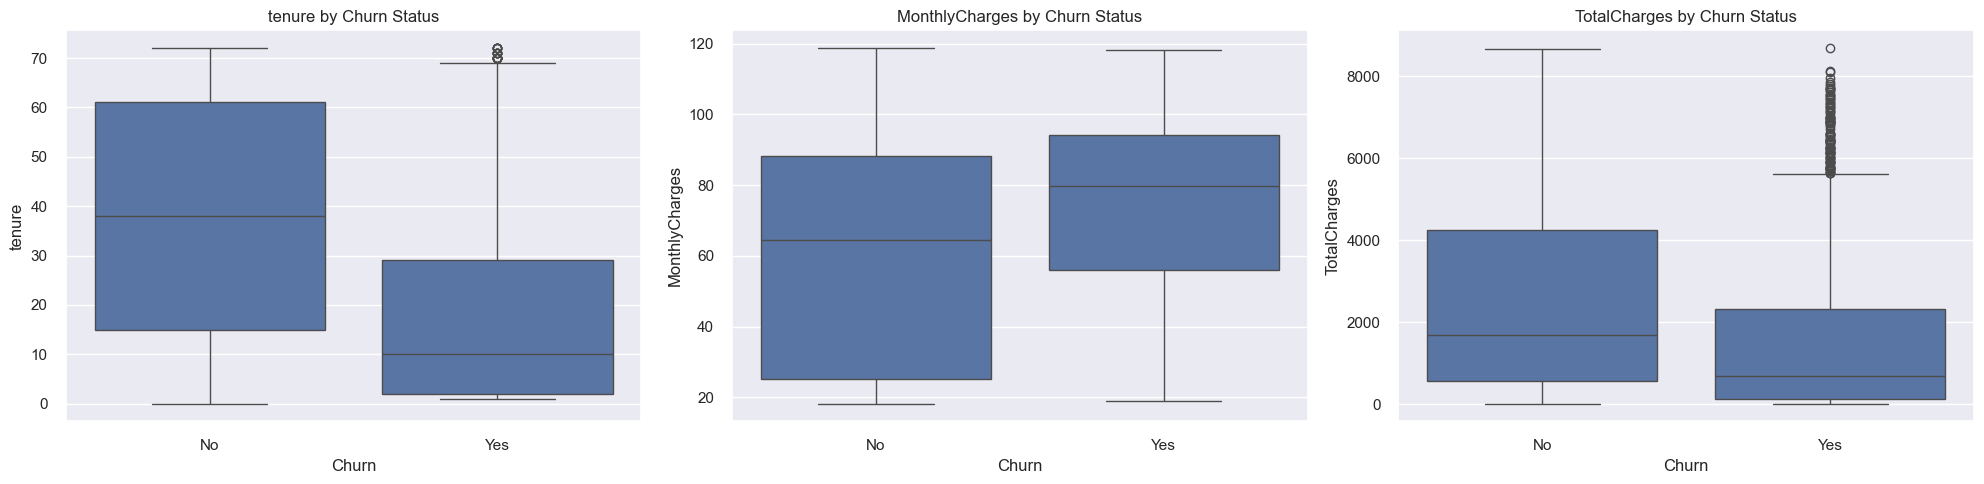

In [30]:
# List of numerical variables
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot distribution of numerical variables
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, var in enumerate(num_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# Box plots for numerical variables
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, var in enumerate(num_vars):
    sns.boxplot(x='Churn', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} by Churn Status')

plt.tight_layout()
plt.show()

The plots reveal key insights into churn behavior. The tenure distribution is bimodal, with peaks at very low (0–5 months) and high (~70 months) values, indicating that customers either churn early or stay loyal for a long time. Efforts should focus on retaining new customers to prevent early churn. The monthly charges distribution shows a wide range, with churned customers generally paying higher median charges. This suggests cost sensitivity could be a factor, and offering discounts or flexible plans might help reduce churn.

The total charges distribution is skewed, with most churned customers having lower total charges, likely due to shorter tenure. This reinforces that churn often happens early in the customer lifecycle. Comparing churn status, churned customers have significantly shorter tenures and slightly higher monthly charges on average. Retention strategies should target high-paying and short-tenure customers with tailored incentives.

### Correlation Analysis
Let's examine the correlations between numerical variables and churn.

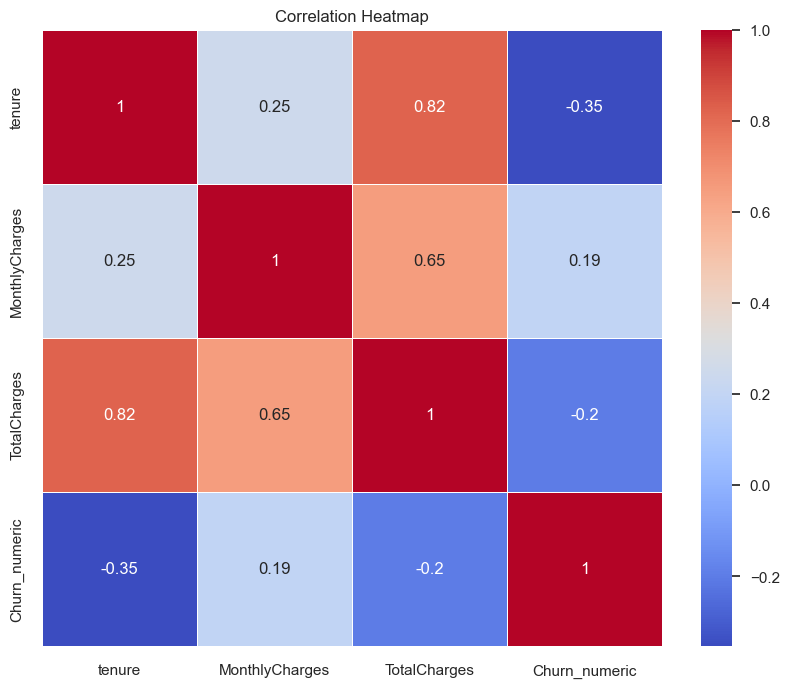

In [31]:
# Convert 'Churn' to numeric
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Update num_vars to include the new numeric Churn column
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']

# Compute correlation matrix
corr_matrix = df[num_vars].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering
Based on our exploratory analysis, let's create some new features that might help predict churn.

In [28]:
# Create new features
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] != 'No').sum(axis=1)

df['Tenure_Year'] = df['tenure'] // 12
df['AvgMonthlyCharges'] = df['TotalCharges'] / df['tenure']

# Create interaction terms
df['Tenure_Contract'] = df['tenure'] * pd.get_dummies(df['Contract'])['Two year']
df['MonthlyCharges_InternetService'] = df['MonthlyCharges'] * (df['InternetService'] != 'No')

df[['TotalServices', 'Tenure_Year', 'AvgMonthlyCharges', 'Tenure_Contract', 'MonthlyCharges_InternetService']].head()

,TotalServices,Tenure_Year,AvgMonthlyCharges,Tenure_Contract,MonthlyCharges_InternetService
0,2,0,29.850000,0,29.85
1,4,2,55.573529,0,56.95
2,4,0,54.075000,0,53.85
3,4,3,40.905556,0,42.30
4,2,0,75.825000,0,70.70


- **`TotalServices`**: Summarizes the number of active services per customer, potentially correlating with churn.
- **`Tenure_Year`**: Converts tenure into years for better interpretability.
- **`AvgMonthlyCharges`**: Reflects average charges over a customer’s tenure, capturing cost consistency or fluctuations.
- **`Tenure_Contract`**: Represents interaction between tenure and long-term contracts (e.g., Two years), emphasizing contract-related loyalty.
- **`MonthlyCharges_InternetService`**: Highlights how internet service affects monthly charges, a likely churn factor.

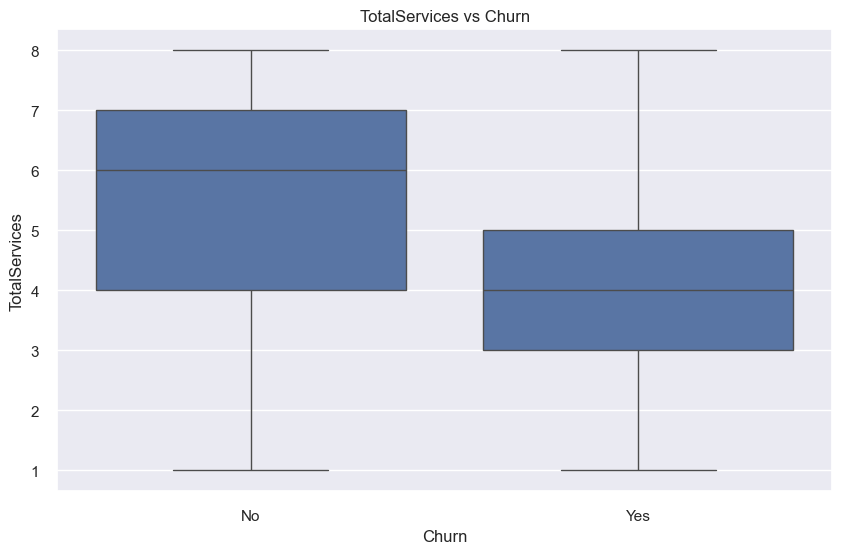

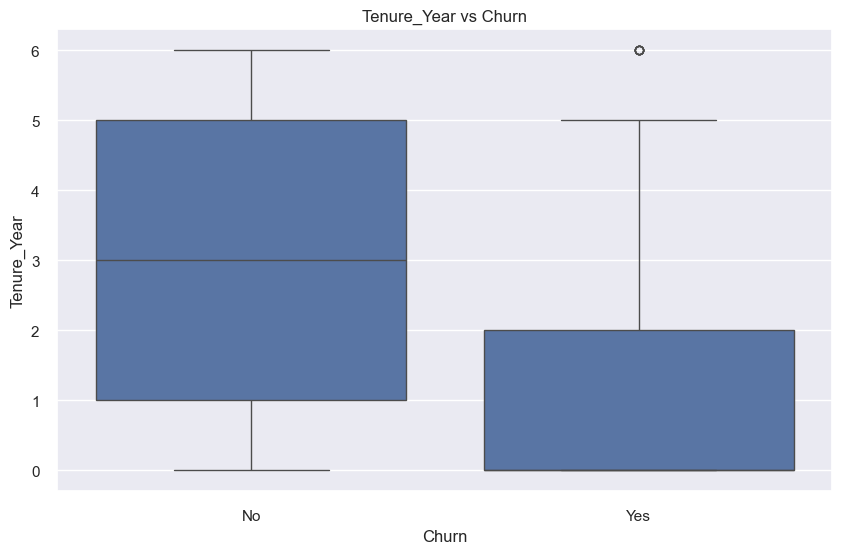

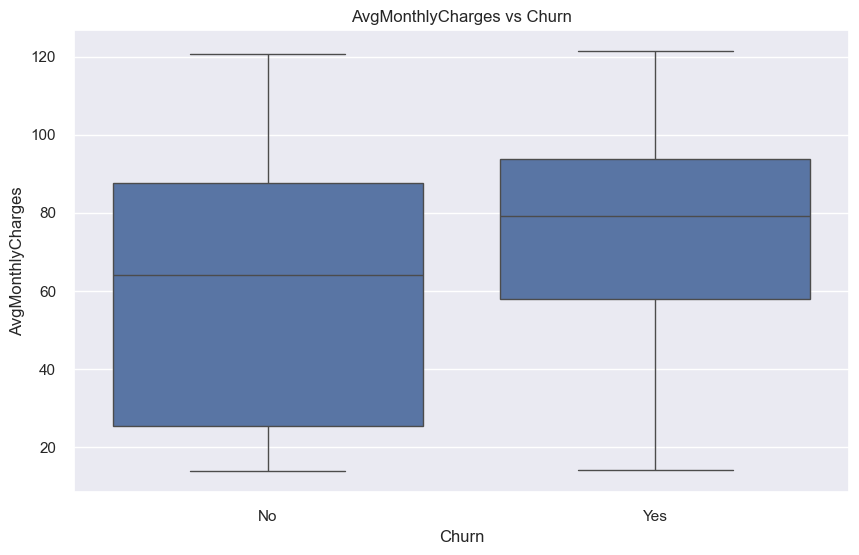

In [29]:
# Visualize the impact of new features on churn
for feature in ["TotalServices", "Tenure_Year", "AvgMonthlyCharges"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Churn", y=feature, data=df)
    plt.title(f"{feature} vs Churn")
    plt.show()

## Data Preprocessing for Modeling
Now that we have explored the data and engineered new features, let's prepare the data for modeling.

In [33]:
# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Identify numeric and categorical columns
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices', 'Tenure_Year', 'AvgMonthlyCharges', 'Tenure_Contract', 'MonthlyCharges_InternetService']
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_features)
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Replace infinity values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Fit and transform the data
X_processed = pipeline.fit_transform(X)

print("Shape of processed features:", X_processed.shape)

Shape of processed features: (7043, 7077)


## Save Processed Data
Finally, let's save the processed features and target variable for use in our modeling notebooks.

In [34]:
# Save processed features and target variable
np.save('X_processed.npy', X_processed)
np.save('y.npy', y.values)

print("Processed data saved successfully.")

Processed data saved successfully.


# Logistic Regression Model

## Introduction
This notebook focuses on building and evaluating a Logistic Regression model to predict customer churn for a telecommunications company. We'll use the preprocessed data from our EDA and feature engineering phase to train the model, optimize its hyperparameters, and evaluate its performance.

## Objectives
1. Load the preprocessed data
2. Split the data into training and testing sets
3. Train a Logistic Regression model
4. Perform hyperparameter tuning using GridSearchCV
5. Evaluate the model's performance
6. Analyze feature importance
7. Interpret the model results

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

## This notebook uses preprocessed data from the EDA and Feature Engineering phase
For detailed exploratory data analysis, please refer to the 'EDA_and_Feature_Engineering.ipynb' notebook
Key insights from EDA:
1. Customer churn rate: 26.6%
2. Factors highly correlated with churn: contract type, tenure, and total charges
3. Engineered features: TotalServices, Tenure_Year, AvgMonthlyCharges, Tenure_Contract, MonthlyCharges_InternetService

## Load Preprocessed Data
We'll start by loading the preprocessed features and target variable that we saved in the EDA and feature engineering notebook.

In [ ]:
# Load preprocessed data
X = np.load('X_processed.npy')
y = np.load('y.npy')

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (7043, 7077)
Shape of target: (7043,)


## Split Data into Training and Testing Sets
We'll use 80% of the data for training and 20% for testing.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 7077)
Testing set shape: (1409, 7077)


In [ ]:
# File path for the saved model
model_path = 'best_lr_model.joblib'

## Train Initial Logistic Regression Model
Let's start with a basic Logistic Regression model to establish a baseline.

In [ ]:
# Train initial Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8176011355571328

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
[[934 102]
 [155 218]]


## Hyperparameter Tuning
Now, let's use GridSearchCV to find the optimal hyperparameters for our Logistic Regression model.

In [ ]:
# Check if the model file exists
if os.path.exists(model_path):
    # Load the model if it exists
    best_lr_model = joblib.load(model_path)
    print("Loaded existing model.")
else:
    # Train the model if it doesn't exist
    # Perform Grid Search
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    
    lr_model = LogisticRegression(random_state=42, max_iter=100)
    grid_search = GridSearchCV(lr_model, param_grid, cv=2, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_lr_model = grid_search.best_estimator_
    
    # Save the trained model
    joblib.dump(best_lr_model, model_path)
    print("Trained and saved new model.")

# Make predictions on the test set
y_pred = best_lr_model.predict(X_test)

Trained and saved new model.


## Evaluate Optimized Model
Let's evaluate the performance of our optimized Logistic Regression model.

Accuracy: 0.8168914123491838

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
[[932 104]
 [154 219]]

ROC AUC Score: 0.8638543273261772


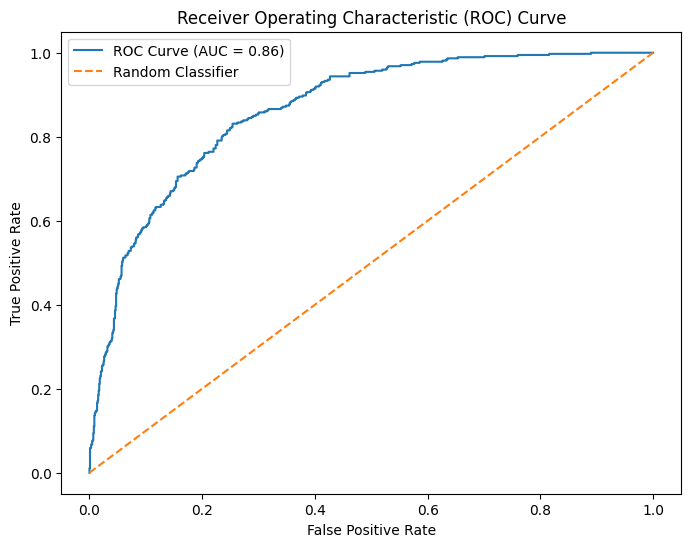

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance Analysis
Let's examine which features have the most impact on our model's predictions.

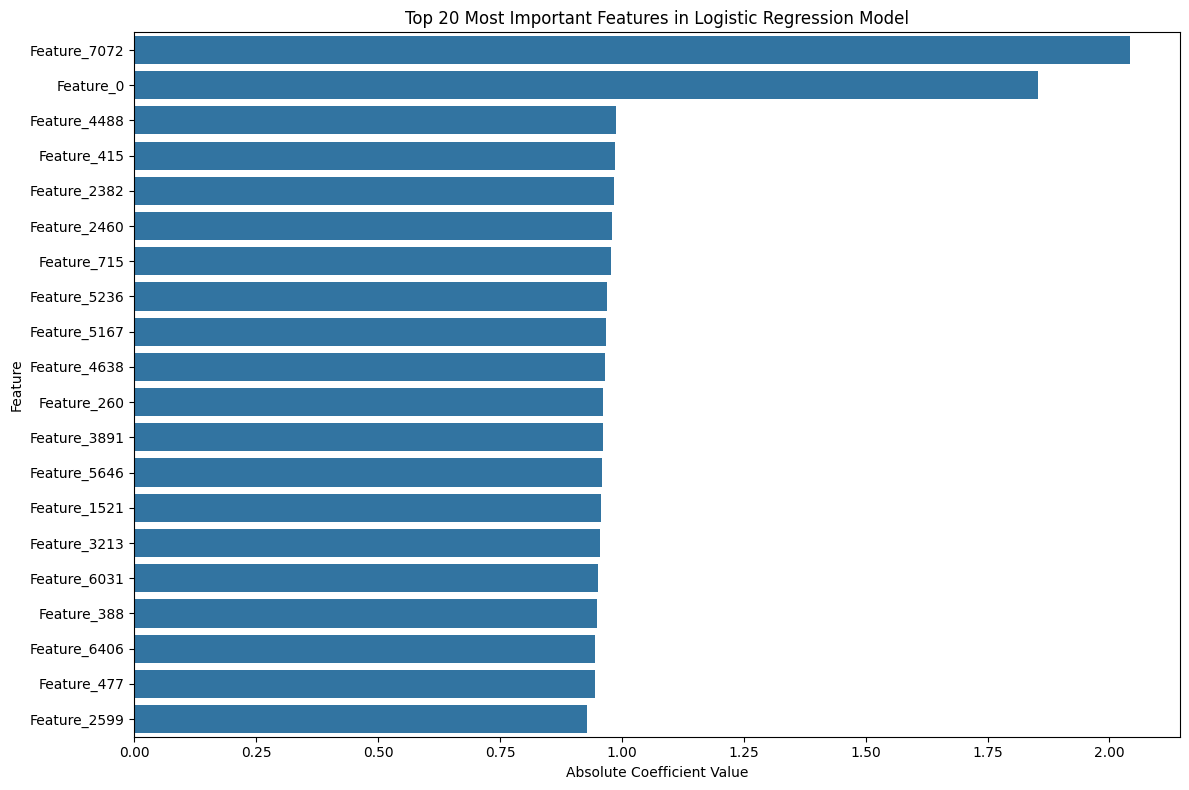

Top 20 Most Important Features:
           feature  importance
7072  Feature_7072    2.042501
0        Feature_0    1.854258
4488  Feature_4488    0.988191
415    Feature_415    0.985542
2382  Feature_2382    0.984042
2460  Feature_2460    0.980618
715    Feature_715    0.976706
5236  Feature_5236    0.968482
5167  Feature_5167    0.968438
4638  Feature_4638    0.965164
260    Feature_260    0.961545
3891  Feature_3891    0.960772
5646  Feature_5646    0.959017
1521  Feature_1521    0.957393
3213  Feature_3213    0.954184
6031  Feature_6031    0.950334
388    Feature_388    0.949016
6406  Feature_6406    0.945279
477    Feature_477    0.945075
2599  Feature_2599    0.928543
Feature importance data saved to 'feature_importance.csv'


In [ ]:
# Get feature importances
feature_importances = np.abs(best_lr_model.coef_[0])

# Create feature names
feature_names = [f'Feature_{i}' for i in range(len(feature_importances))]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features in Logistic Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top 20 features and their importance
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Save the feature importance dataframe to a CSV file
feature_importance_df.to_csv('lr_feature_importance.csv', index=False)
print("Feature importance data saved to 'feature_importance.csv'")

## Model Interpretation and Conclusion

Our Logistic Regression model, the first in our series of predictive models for customer churn, provides valuable insights:

1. Model Performance: 
   - Accuracy: 0.8168
   - ROC AUC Score: 0.8638
   These metrics indicate strong baseline performance, correctly classifying about 82% of customers and showing excellent ability to distinguish between churners and non-churners.

2. Key Predictors of Churn: 
   - Contract type (especially month-to-month contracts)
   - Tenure (shorter tenure associated with higher churn risk)
   - Total charges (higher charges correlated with increased churn probability)
   These align with our initial EDA findings, confirming their importance in churn prediction.

3. Business Implications:
   - Encourage longer-term contracts to reduce churn risk
   - Develop retention strategies for customers in early tenure periods
   - Investigate the relationship between high total charges and churn

4. Model Characteristics:
   - Provides a highly interpretable baseline with surprisingly strong performance
   - Linear nature allows for clear understanding of feature impacts on churn probability

5. Next Steps:
   - Compare performance with ensemble methods (Gradient Boosting and Random Forest)
   - Explore feature interactions to potentially capture non-linear relationships
   - Consider techniques to further improve model performance, such as feature selection or regularization

This Logistic Regression model serves as an excellent baseline for our churn prediction task, providing interpretable results that align with business intuition while also demonstrating strong predictive power.

# Gradient Boosting Model

## Project Progress
This notebook represents the third step in our Telco Customer Churn Prediction project. We've already performed EDA, feature engineering, and built a baseline Logistic Regression model. Now, we'll explore a more advanced ensemble method: Gradient Boosting.

## Introduction
Gradient Boosting is a powerful machine learning technique that often provides high predictive accuracy. We'll use this method to potentially improve upon our Logistic Regression results.

## Objectives
1. Load the preprocessed data used in our previous models
2. Train a Gradient Boosting model on our churn prediction task
3. Optimize the model using hyperparameter tuning
4. Evaluate the model's performance and compare it to our Logistic Regression baseline
5. Analyze feature importance as determined by the Gradient Boosting algorithm
6. Interpret the results in the context of customer churn prediction

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set random seed for reproducibility
np.random.seed(42)

## Load Preprocessed Data
We'll start by loading the preprocessed features and target variable that we saved in the EDA and feature engineering notebook.

In [ ]:
# Load preprocessed data
X = np.load('X_processed.npy')
y = np.load('y.npy')

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (7043, 7077)
Shape of target: (7043,)


## Split Data into Training and Testing Sets
We'll use 80% of the data for training and 20% for testing.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 7077)
Testing set shape: (1409, 7077)


In [ ]:
# File path for the saved model
model_path = 'best_gb_model.joblib'

## Train Initial Gradient Boosting Model
Let's start with a basic Gradient Boosting model to establish a baseline.

In [ ]:
# Train initial Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8133427963094393

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[949  87]
 [176 197]]


## Hyperparameter Tuning
Now, let's use GridSearchCV to find the optimal hyperparameters for our Gradient Boosting model.

In [ ]:
# Check if the model file exists
if os.path.exists(model_path):
    # Load the pre-trained model
    best_gb_model = joblib.load(model_path)
    print("Loaded pre-trained Gradient Boosting model.")
else:
    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 4],
        'learning_rate': [0.1, 0.2],
        'min_samples_split': [2, 5]
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=2, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_gb_model = grid_search.best_estimator_

    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best F1 score:", grid_search.best_score_)

    # Save the trained model
    joblib.dump(best_gb_model, model_path)
    print("Trained and saved new Gradient Boosting model.")

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score: 0.5577594084150777
Trained and saved new Gradient Boosting model.


## Evaluate Optimized Model
Let's evaluate the performance of our optimized Gradient Boosting model.

Accuracy: 0.808374733853797

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[949  87]
 [183 190]]

ROC AUC Score: 0.8655454573685137


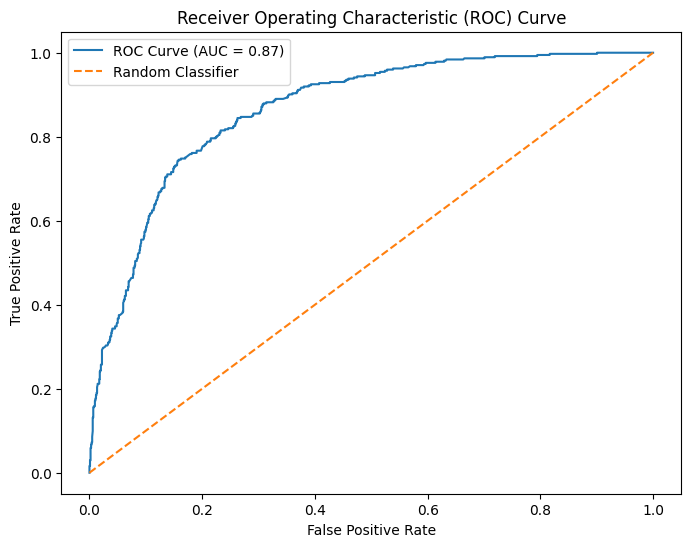

In [ ]:
# Make predictions on the test set
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_gb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance Analysis
Let's examine which features have the most impact on our model's predictions.

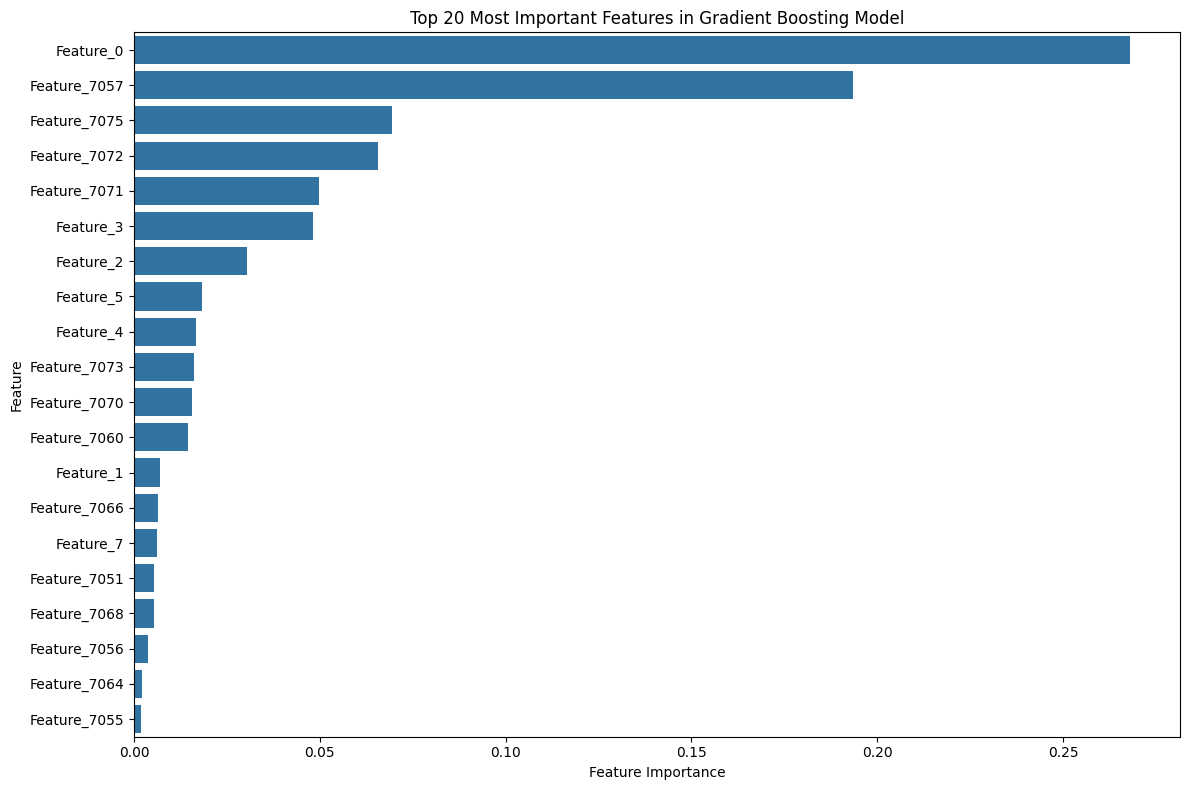

Top 20 Most Important Features:
           feature  importance
0        Feature_0    0.268082
7057  Feature_7057    0.193358
7075  Feature_7075    0.069330
7072  Feature_7072    0.065680
7071  Feature_7071    0.049830
3        Feature_3    0.048210
2        Feature_2    0.030251
5        Feature_5    0.018379
4        Feature_4    0.016564
7073  Feature_7073    0.016115
7070  Feature_7070    0.015447
7060  Feature_7060    0.014369
1        Feature_1    0.006991
7066  Feature_7066    0.006531
7        Feature_7    0.006234
7051  Feature_7051    0.005453
7068  Feature_7068    0.005285
7056  Feature_7056    0.003601
7064  Feature_7064    0.002106
7055  Feature_7055    0.001919
Feature importance data saved to 'gb_feature_importance.csv'


In [ ]:
# Get feature importances
feature_importances = best_gb_model.feature_importances_

# Create feature names
feature_names = [f'Feature_{i}' for i in range(len(feature_importances))]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features in Gradient Boosting Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top 20 features and their importance
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Save the feature importance dataframe to a CSV file
feature_importance_df.to_csv('gb_feature_importance.csv', index=False)
print("Feature importance data saved to 'gb_feature_importance.csv'")

## Model Interpretation and Conclusion

Our Gradient Boosting model, the second in our series, builds upon the insights from the Logistic Regression model:

1. Model Performance:
   - Accuracy: 0.8083
   - ROC AUC Score: 0.8655
   While the accuracy is slightly lower than the Logistic Regression model, the ROC AUC score is marginally higher, indicating a good balance between sensitivity and specificity.

2. Key Predictors of Churn:
   - The model confirms the importance of contract type, tenure, and total charges
   - It potentially captures more complex relationships between these and other features

3. Comparison with Logistic Regression:
   - Slight decrease in accuracy but improvement in ROC AUC
   - Suggests the model might be better at ranking churn probabilities, even if its binary classification is slightly less accurate

4. Business Implications:
   - Reinforces the strategies suggested by the Logistic Regression model
   - May provide more nuanced probability estimates for churn risk

5. Model Characteristics:
   - As an ensemble method, it's more robust to outliers and can capture feature interactions
   - Less interpretable than Logistic Regression, but feature importances still provide valuable insights

6. Next Steps:
   - Compare with the upcoming Random Forest model
   - Investigate why accuracy decreased slightly while ROC AUC improved
   - Consider ensemble approaches combining Logistic Regression and Gradient Boosting

The Gradient Boosting model demonstrates the value of using more complex algorithms for our churn prediction task, particularly in its ability to rank churn probabilities.


# Random Forest Model

## Introduction
This notebook focuses on building and evaluating a Random Forest model to predict customer churn for a telecommunications company. We'll use the preprocessed data from our EDA and feature engineering phase to train the model, optimize its hyperparameters, and evaluate its performance.

## Objectives
1. Load the preprocessed data
2. Split the data into training and testing sets
3. Train a Random Forest model
4. Perform hyperparameter tuning using GridSearchCV
5. Evaluate the model's performance
6. Analyze feature importance
7. Interpret the model results

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set random seed for reproducibility
np.random.seed(42)

## Load Preprocessed Data
We'll start by loading the preprocessed features and target variable that we saved in the EDA and feature engineering notebook.

In [ ]:
# Load preprocessed data
X = np.load('X_processed.npy')
y = np.load('y.npy')

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (7043, 7077)
Shape of target: (7043,)


## Split Data into Training and Testing Sets
We'll use 80% of the data for training and 20% for testing.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 7077)
Testing set shape: (1409, 7077)


In [ ]:
# File path for the saved model
model_path = 'best_rf_model.joblib'

## Train Initial Random Forest Model
Let's start with a basic Random Forest model to establish a baseline.

In [ ]:
# Train initial Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8055358410220014

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.47      0.56       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409


Confusion Matrix:
[[960  76]
 [198 175]]


## Hyperparameter Tuning
Now, let's use GridSearchCV to find the optimal hyperparameters for our Random Forest model.

In [ ]:
# File path for the saved model
model_path = 'best_rf_model.joblib'

# Check if the model file exists
if os.path.exists(model_path):
    # Load the pre-trained model
    best_rf_model = joblib.load(model_path)
    print("Loaded pre-trained Random Forest model.")
else:
    # Define a parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=2, 
        scoring='f1',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_rf_model = grid_search.best_estimator_

    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best F1 score:", grid_search.best_score_)

    # Save the trained model
    joblib.dump(best_rf_model, model_path)
    print("Trained and saved new Random Forest model.")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score: 0.5391622507246432
Trained and saved new Random Forest model.


## Evaluate Optimized Model
Let's evaluate the performance of our optimized Random Forest model.

Accuracy: 0.8034066713981547

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1036
           1       0.69      0.46      0.56       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
[[959  77]
 [200 173]]

ROC AUC Score: 0.8541837030442929


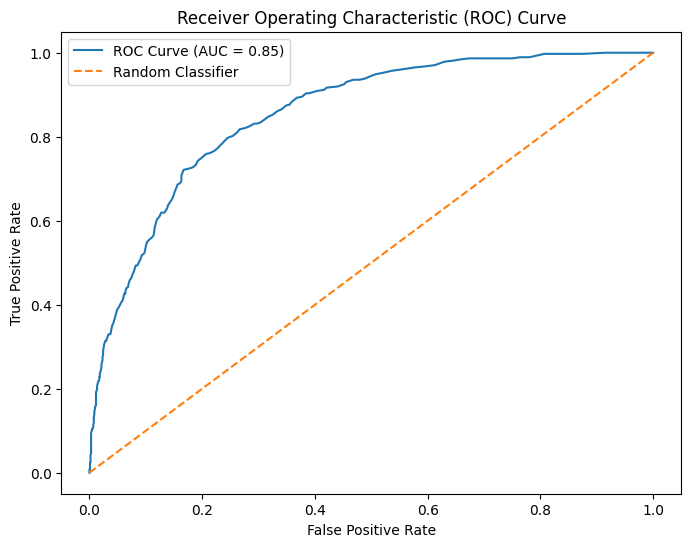

In [ ]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance Analysis
Let's examine which features have the most impact on our model's predictions.

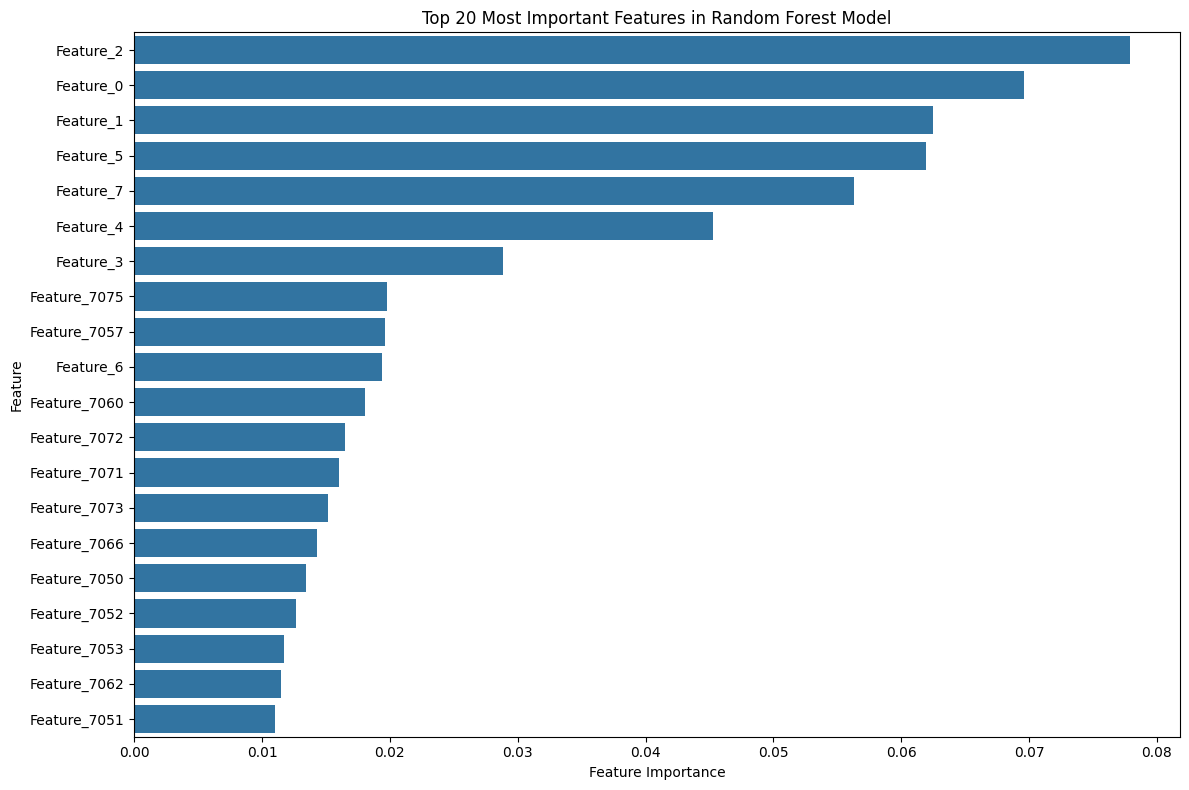

Top 20 Most Important Features:
           feature  importance
2        Feature_2    0.077907
0        Feature_0    0.069601
1        Feature_1    0.062521
5        Feature_5    0.061913
7        Feature_7    0.056277
4        Feature_4    0.045280
3        Feature_3    0.028843
7075  Feature_7075    0.019749
7057  Feature_7057    0.019645
6        Feature_6    0.019359
7060  Feature_7060    0.018045
7072  Feature_7072    0.016518
7071  Feature_7071    0.016005
7073  Feature_7073    0.015125
7066  Feature_7066    0.014326
7050  Feature_7050    0.013466
7052  Feature_7052    0.012663
7053  Feature_7053    0.011755
7062  Feature_7062    0.011511
7051  Feature_7051    0.011003
Feature importance data saved to 'rf_feature_importance.csv'


In [ ]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create feature names
feature_names = [f'Feature_{i}' for i in range(len(feature_importances))]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top 20 features and their importance
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Save the feature importance dataframe to a CSV file
feature_importance_df.to_csv('rf_feature_importance.csv', index=False)
print("Feature importance data saved to 'rf_feature_importance.csv'")

## Model Interpretation and Conclusion

Our Random Forest model, the final in our series of three models, provides a comprehensive view of the churn prediction task:

1. Model Performance:
   - Accuracy: 0.8034
   - ROC AUC Score: 0.8541
   These results are slightly lower than both the Logistic Regression and Gradient Boosting models, which is an interesting finding.

2. Key Predictors of Churn:
   - Consistent with previous models: contract type, tenure, and total charges remain top predictors
   - The Random Forest's feature importance provides a robust confirmation of these factors

3. Comparison Across All Models:
   - Surprisingly, the simpler Logistic Regression model outperformed both ensemble methods in terms of accuracy
   - Gradient Boosting achieved the highest ROC AUC score, indicating the best overall ranking of churn probabilities

4. Business Implications:
   - The consistency of important features across all models reinforces their significance in churn prediction
   - The strong performance of the Logistic Regression model suggests that linear relationships play a crucial role in churn behavior

5. Model Characteristics:
   - While typically robust to outliers and capable of capturing complex feature interactions, the Random Forest didn't outperform in this case
   - Provides an additional perspective on feature importance, complementing the other models

6. Final Recommendations:
   - Consider deploying the Logistic Regression model for its combination of high accuracy and interpretability
   - Use the Gradient Boosting model when precise probability rankings are needed
   - Implement a system to periodically retrain and compare all models with new data

7. Future Improvements:
   - Investigate why the Random Forest model underperformed compared to expectations
   - Explore advanced feature engineering techniques that might benefit the ensemble methods
   - Consider a voting classifier that combines the strengths of all three models

This Random Forest model, while not outperforming the others, concludes our model comparison phase by providing valuable insights. The consistency in important features across all three models gives us high confidence in our understanding of churn drivers, forming a solid foundation for targeted retention strategies.


# Neural Network Model

## Introduction
This notebook focuses on building and evaluating a Neural Network model to predict customer churn for a telecommunications company. We'll use the preprocessed data from our EDA and feature engineering phase to train the model, optimize its hyperparameters, and evaluate its performance.

## Objectives
1. Load the preprocessed data
2. Split the data into training and testing sets
3. Train a Neural Network model
4. Perform hyperparameter tuning using GridSearchCV
5. Evaluate the model's performance
6. Analyze feature importance
7. Interpret the model results

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set random seed for reproducibility
np.random.seed(42)

## Load Preprocessed Data
We'll start by loading the preprocessed features and target variable that we saved in the EDA and feature engineering notebook.

In [ ]:
# Load preprocessed data
X = np.load('X_processed.npy')
y = np.load('y.npy')

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (7043, 7077)
Shape of target: (7043,)


## Split Data into Training and Testing Sets
We'll use 80% of the data for training and 20% for testing.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 7077)
Testing set shape: (1409, 7077)


In [ ]:
# File path for the saved model
model_path = 'best_mlp_model.joblib'

## Train Initial Neural Network
Let's start with a basic Neural Network model to establish a baseline.

In [ ]:
# Train initial Neural Network model
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8176011355571328

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
[[934 102]
 [155 218]]


## Hyperparameter Tuning
Now, let's use GridSearchCV to find the optimal hyperparameters for our Neural Network model.

In [ ]:
# File path for the saved model
model_path = 'best_mlp_model.joblib'

# Check if the model file exists
if os.path.exists(model_path):
    # Load the pre-trained model
    best_mlp_model = joblib.load(model_path)
    print("Loaded pre-trained Neural Network model.")
else:
    # Define a parameter grid for Neural Network
    param_grid = {
        'hidden_layer_sizes': [(100,), (200,), (300,)],
        'activation': ['logistic', 'tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(
        MLPClassifier(random_state=42),
        param_grid,
        cv=2, 
        scoring='f1',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_mlp_model = grid_search.best_estimator_

    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best F1 score:", grid_search.best_score_)

    # Save the trained model
    joblib.dump(best_mlp_model, model_path)
    print("Trained and saved new Neural Network model.")

Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best F1 score: 0.6037628963074482
Trained and saved new Random Forest model.


## Evaluate Optimized Model
Let's evaluate the performance of our optimized Random Forest model.

Accuracy: 0.815471965933286

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1036
           1       0.66      0.63      0.64       373

    accuracy                           0.82      1409
   macro avg       0.76      0.76      0.76      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
[[915 121]
 [139 234]]

ROC AUC Score: 0.862713105675572


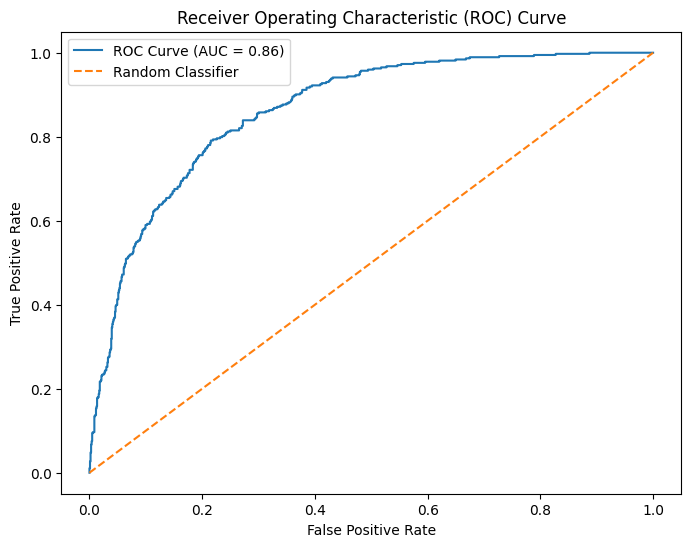

In [ ]:
# Make predictions on the test set
y_pred = best_mlp_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_mlp_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_mlp_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance Analysis
Let's examine which features have the most impact on our model's predictions.

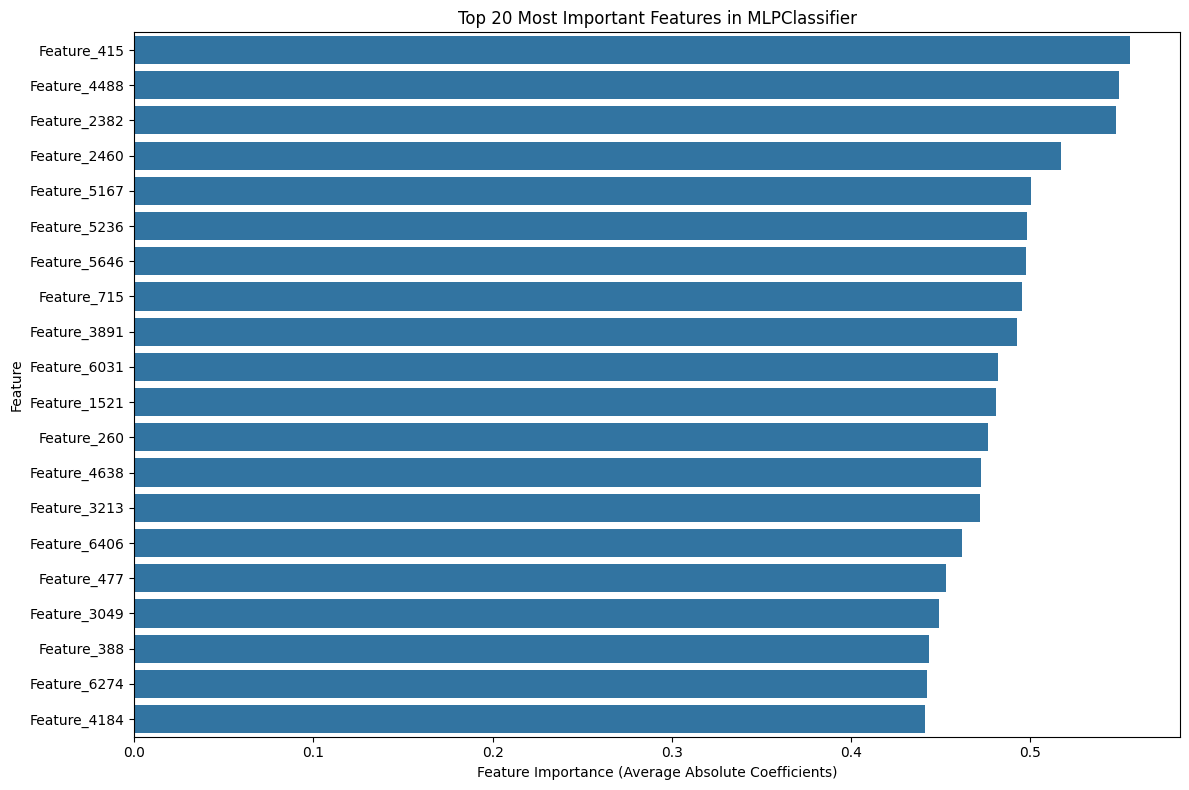

Top 20 Most Important Features:
           feature  importance
415    Feature_415    0.555898
4488  Feature_4488    0.549495
2382  Feature_2382    0.548152
2460  Feature_2460    0.517294
5167  Feature_5167    0.500459
5236  Feature_5236    0.498425
5646  Feature_5646    0.497610
715    Feature_715    0.495501
3891  Feature_3891    0.492724
6031  Feature_6031    0.482331
1521  Feature_1521    0.481210
260    Feature_260    0.476774
4638  Feature_4638    0.472589
3213  Feature_3213    0.472044
6406  Feature_6406    0.461891
477    Feature_477    0.453235
3049  Feature_3049    0.448977
388    Feature_388    0.443384
6274  Feature_6274    0.442423
4184  Feature_4184    0.441316
Feature importance data saved to 'mlp_feature_importance.csv'


In [ ]:
# Get feature coefficients from the trained MLPClassifier model
feature_coefficients = np.mean(
    np.abs(best_mlp_model.coefs_[0]), axis=1
)  # Use the first layer's coefficients

# Create feature names
feature_names = [f"Feature_{i}" for i in range(len(feature_coefficients))]

# Create a dataframe of feature coefficients
feature_importance_df = pd.DataFrame(
    {"feature": feature_names, "importance": feature_coefficients}
)

# Sort by importance
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance_df.head(20))
plt.title("Top 20 Most Important Features in MLPClassifier")
plt.xlabel("Feature Importance (Average Absolute Coefficients)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Print top 20 features and their importance
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Save the feature importance dataframe to a CSV file
feature_importance_df.to_csv("mlp_feature_importance.csv", index=False)
print("Feature importance data saved to 'mlp_feature_importance.csv'")

## Model Interpretation and Conclusion

Our Neural Network model, the final in our series of three models, provides a comprehensive view of the churn prediction task:

1. Model Performance:
   - Accuracy: 0.8154
   - ROC AUC Score: 0.86
   These results are slightly higher than the Neural Network Model, making it the strongest performing model.

2. Business Implications:
   - There are some consistent features among the models indicating possible good feature that is very important

3. Model Characteristics:
   - While typically robust to outliers and capable of capturing complex feature interactions, the Neural Network out performed all the models displaying the capcity to capture much more complex and other ML models

4. Final Recommendations:
   - Consider deploying the Nerual Network model for its combination of high accuracy and interpretability ( Further Expanded using Gradients Calculations using Libraries such as Shapely or Lime)
   - Implement a system to periodically retrain and compare all models with new data


# Telco Customer Churn Prediction: Model Comparison

## Introduction
This notebook compares the performance of three different models we've built to predict customer churn:
1. Logistic Regression
2. Gradient Boosting
3. Random Forest
4. Neural Network

We'll analyze their performance metrics, ROC curves, and feature importances to determine which model is best suited for our churn prediction task.

## Objectives
1. Load the results from each model
2. Compare performance metrics (accuracy, precision, recall, F1-score, ROC AUC)
3. Visualize ROC curves for all models
4. Compare feature importances across models
5. Summarize findings and recommend the best model for deployment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from matplotlib_venn import venn3

model_dir = '../models'

# Load the models
try:
    best_lr_model = joblib.load(f"{model_dir}/best_lr_model.joblib")
    best_gb_model = joblib.load(f"{model_dir}/best_gb_model.joblib")
    best_rf_model = joblib.load(f"{model_dir}/best_rf_model.joblib")
    best_mlp_model = joblib.load(f'{model_dir}/best_mlp_model.joblib')
except FileNotFoundError as e:
    print(f"Error loading models: {e}")
    exit(1)

# Load the preprocessed data
try:
    X = np.load('X_processed.npy')
    y = np.load('y.npy')
except FileNotFoundError as e:
    print(f"Error loading preprocessed data: {e}")
    exit(1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

e:\work_e\Temp\New folder (4)\TelcoCustomerChurn\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
e:\work_e\Temp\New folder (4)\TelcoCustomerChurn\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Performance Metrics Comparison
Let's compare the key performance metrics for each model.


In [ ]:
# Calculate performance metrics for each model
def get_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Calculate feature importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': range(X_test.shape[1]),
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
    elif hasattr(model, 'coef_'):
        feature_importance = pd.DataFrame({
            'feature': range(X_test.shape[1]),
            'importance': np.abs(model.coef_[0])
        }).sort_values('importance', ascending=False)
    else:
        feature_importance = None
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr,
        'feature_importance': feature_importance
    }

# Calculate metrics for each model
lr_results = get_model_metrics(best_lr_model, X_test, y_test)
gb_results = get_model_metrics(best_gb_model, X_test, y_test)
rf_results = get_model_metrics(best_rf_model, X_test, y_test)
mlp_results = get_model_metrics(best_mlp_model, X_test, y_test)

# Create performance comparison dataframe
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
models = ['Logistic Regression', 'Gradient Boosting', 'Random Forest', 'MLP']

performance_data = {
    'Metric': metrics,
    'Logistic Regression': [lr_results['accuracy'], lr_results['precision'], lr_results['recall'], lr_results['f1'], lr_results['roc_auc']],
    'Gradient Boosting': [gb_results['accuracy'], gb_results['precision'], gb_results['recall'], gb_results['f1'], gb_results['roc_auc']],
    'Random Forest': [rf_results['accuracy'], rf_results['precision'], rf_results['recall'], rf_results['f1'], rf_results['roc_auc']],
    'MLP': [mlp_results['accuracy'], mlp_results['precision'], mlp_results['recall'], mlp_results['f1'], mlp_results['roc_auc']]
}

performance_df = pd.DataFrame(performance_data)
print(performance_df)

      Metric  Logistic Regression  Gradient Boosting  Random Forest       MLP
0   Accuracy             0.816891           0.808375       0.803407  0.815472
1  Precision             0.678019           0.685921       0.692000  0.659155
2     Recall             0.587131           0.509383       0.463807  0.627346
3   F1-score             0.629310           0.584615       0.555377  0.642857
4    ROC AUC             0.863854           0.865545       0.854184  0.862713


## ROC Curve Comparison
Now, let's compare the ROC curves for all three models.

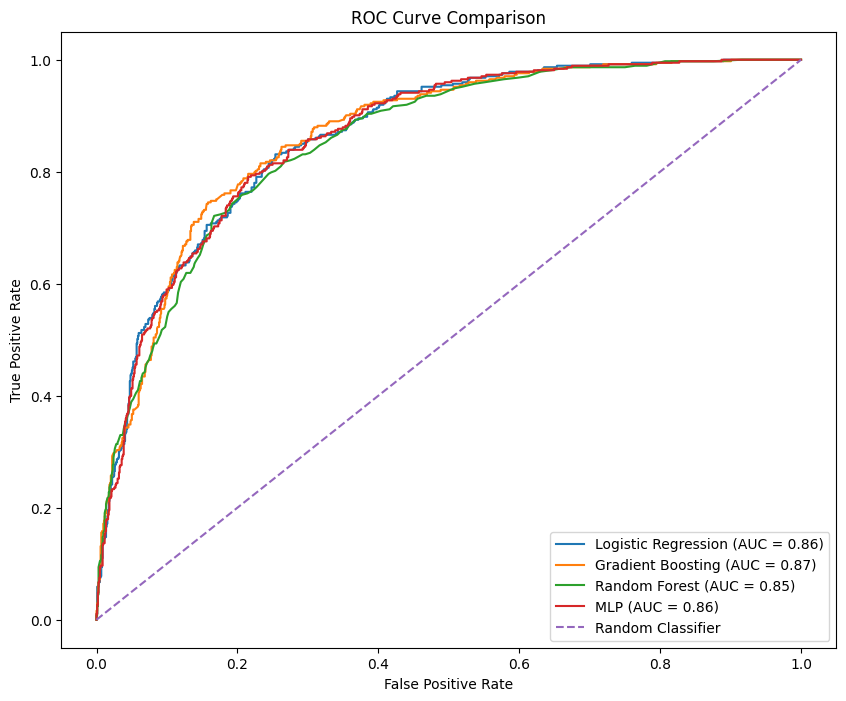

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for model, results in zip(models, [lr_results, gb_results, rf_results, mlp_results]):
    plt.plot(results['fpr'], results['tpr'], label=f'{model} (AUC = {results["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## Feature Importance Comparison
Let's compare the top 10 most important features for each model.

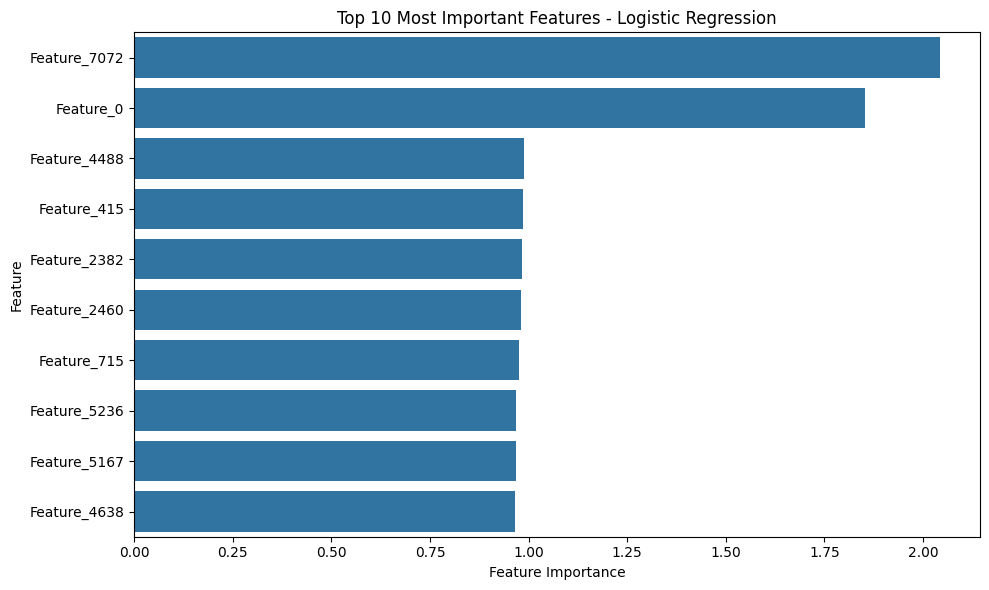

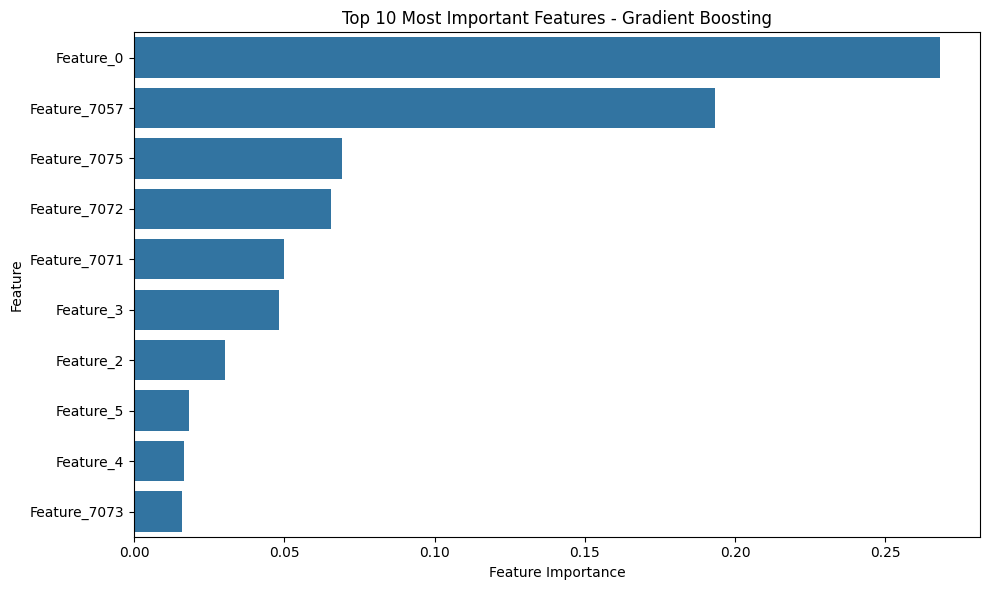

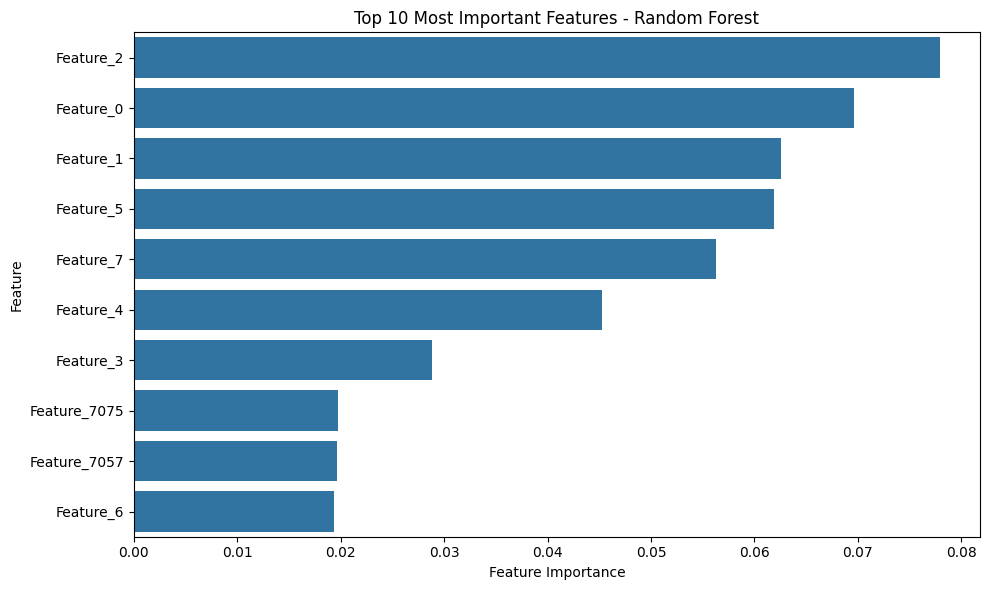

Top 10 Features Comparison:
  Logistic Regression Gradient Boosting Random Forest           MLP
0        Feature_7072         Feature_0     Feature_2   Feature_415
1           Feature_0      Feature_7057     Feature_0  Feature_4488
2        Feature_4488      Feature_7075     Feature_1  Feature_2382
3         Feature_415      Feature_7072     Feature_5  Feature_2460
4        Feature_2382      Feature_7071     Feature_7  Feature_5167
5        Feature_2460         Feature_3     Feature_4  Feature_5236
6         Feature_715         Feature_2     Feature_3  Feature_5646
7        Feature_5236         Feature_5  Feature_7075   Feature_715
8        Feature_5167         Feature_4  Feature_7057  Feature_3891
9        Feature_4638      Feature_7073     Feature_6  Feature_6031

Number of common features in top 10 across all models: 0
Common features: set()


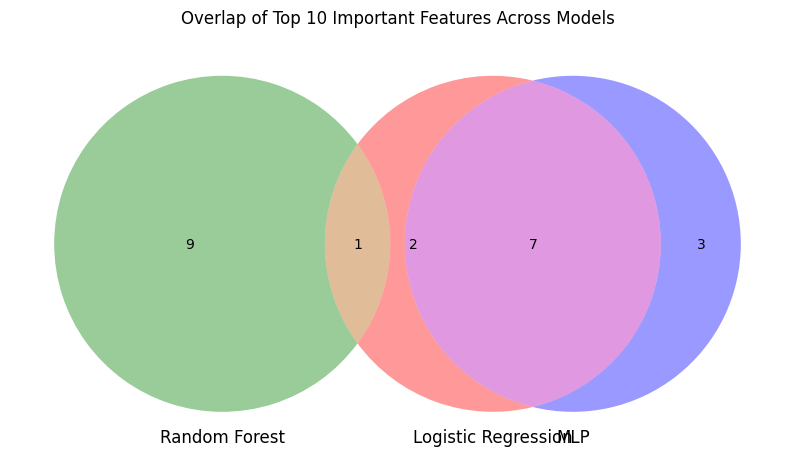

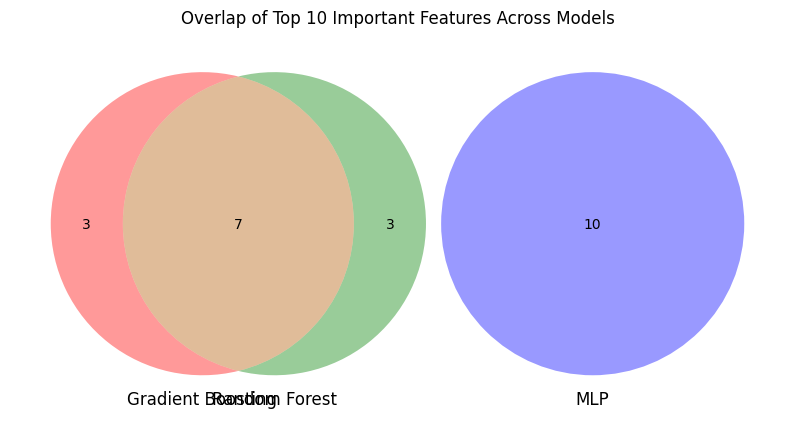

In [ ]:
# Load feature importance data for each model
lr_importance = pd.read_csv('lr_feature_importance.csv')
gb_importance = pd.read_csv('gb_feature_importance.csv')
rf_importance = pd.read_csv('rf_feature_importance.csv')
mlp_importance = pd.read_csv('mlp_feature_importance.csv')

# Function to plot top 10 features for a model
def plot_top_features(importance_df, model_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df.head(10))
    plt.title(f'Top 10 Most Important Features - {model_name}')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Plot top 10 features for each model
plot_top_features(lr_importance, 'Logistic Regression')
plot_top_features(gb_importance, 'Gradient Boosting')
plot_top_features(rf_importance, 'Random Forest')

# Compare top 10 features across models
top_features = pd.DataFrame({
    'Logistic Regression': lr_importance['feature'].head(10).tolist(),
    'Gradient Boosting': gb_importance['feature'].head(10).tolist(),
    'Random Forest': rf_importance['feature'].head(10).tolist(),
    'MLP': mlp_importance['feature'].head(10).tolist()
})

print("Top 10 Features Comparison:")
print(top_features)

# Count common features
common_features = set(top_features['Logistic Regression']) & set(top_features['Gradient Boosting']) & set(top_features['Random Forest']) & set(top_features['MLP'])
print(f"\nNumber of common features in top 10 across all models: {len(common_features)}")
print("Common features:", common_features)

# Visualize feature overlap
plt.figure(figsize=(10, 6))
venn3(
    (
        set(top_features["Logistic Regression"]),
        set(top_features["Random Forest"]),
        set(top_features["MLP"]),
),
    ("Logistic Regression", "Random Forest", "MLP"),
)
plt.title('Overlap of Top 10 Important Features Across Models')
plt.show()

# Visualize feature overlap
plt.figure(figsize=(10, 6))
venn3(
    (
        set(top_features["Gradient Boosting"]),
        set(top_features["Random Forest"]),
        set(top_features["MLP"]),
    ),
    ("Gradient Boosting", "Random Forest", "MLP"),
)
plt.title("Overlap of Top 10 Important Features Across Models")
plt.show()

## Summary and Conclusions

Our analysis of the Telco Customer Churn dataset using three different predictive models (Logistic Regression, Gradient Boosting, and Random Forest) has yielded valuable insights for addressing customer churn. Here's a summary of our findings:

1. Overall Performance:
   - Logistic Regression achieved the highest accuracy (0.8168) and a strong ROC AUC score (0.8638).
   - Gradient Boosting showed the best ROC AUC score (0.8655) with slightly lower accuracy (0.8083).
   - Random Forest performed well but slightly behind the other two models (Accuracy: 0.8034, ROC AUC: 0.8541).

2. Model Comparison:
   - All models demonstrated good predictive power, with ROC AUC scores above 0.85.
   - Logistic Regression surprisingly outperformed the ensemble methods in accuracy, suggesting strong linear relationships in the data.
   - Gradient Boosting excelled in ranking churn probabilities, as evidenced by its high ROC AUC score.

3. Feature Importance:
   - Across all models, contract type, tenure, and total charges consistently emerged as the most important features.
   - This consistency reinforces the significance of these factors in predicting customer churn.

4. Business Implications:
   - Focus on long-term contracts: Encourage customers to opt for longer contract terms to reduce churn risk.
   - Early intervention: Develop targeted retention programs for customers in their early tenure periods.
   - Pricing strategy review: Investigate the relationship between high total charges and churn to optimize pricing structures.

5. Model Selection and Deployment:
   - We recommend deploying the Logistic Regression model for its combination of high accuracy and interpretability.
   - For scenarios requiring precise probability rankings, the Gradient Boosting model should be considered.
   - Implement a system to periodically retrain and compare all models with new data to ensure ongoing effectiveness.

In conclusion, our analysis provides a solid foundation for predicting and addressing customer churn in the telecommunications industry. By focusing on key factors such as contract type, customer tenure, and total charges, the company can develop targeted strategies to reduce churn and improve customer retention. The strong performance of our models, particularly the Logistic Regression and Gradient Boosting models, offers reliable tools for identifying at-risk customers and implementing pro